# Project: Investigate a Tmdb movies dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I decided to work on tmdb_movies data.As per the steps of data analysis process, I will go through these.This dataset have 10866 rows and 21 columns.
There is a lot of raw data that should be cleaned and polished before making analysis.
Following Research questions I am going to ask.

### Research Question

1.Which year has highest release of movies?

2.Which genre has highest release of movies?

3.Which movie has the highest or lowest profit?

4.Which movie has highest and lowest earned revenue?

5.Which movie has longest and shortest runtime?

6.Top 20 movies with longest runtime.

7.Which length movies are most liked by the audiences according to their popularity?

8.How does popularity affect the movie's profit?


In [1]:
# import all important libraries needed for this project
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('tmdb-movies.csv')
df.head()              # this will show first rows of dataset

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.tail()              # this will show last rows of dataset

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
df.shape              # This method used to get the rows and columns of dataset

(10866, 21)

In [5]:
df.info()             #  this method hepls to get the concise summary of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

By using this method, we can get the brief summary of dataframe. 

In [6]:
df.describe()  # this will give you statistical summary of dataframe

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.dtypes    # it will give you data type of each column 

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

As we seen above,there is problem with datatype of release_date.It should be in datetime format.

In [8]:
df['release_date']=pd.to_datetime(df['release_date'])

In [9]:
# Now confirm the datatype of release_date
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [10]:
# let's have a look on missing values in dataframe 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
#Check the duplicated rows in dataframe and delete 

df.duplicated().sum()

1

### Data Cleaning 
(It is nessarry to clean data to make good analysis otherwise it would create some problems)

In [12]:
df.drop_duplicates(inplace=True)
##now the total number of rows and columns
df.shape

(10865, 21)

In [13]:
# drop the columns which are not useful

df.drop(['imdb_id','budget_adj','revenue_adj','overview','homepage','tagline','keywords'],axis =1,inplace = True)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


In [14]:
print("Dataset after droping unused columns:",df.shape)

Dataset after droping unused columns: (10865, 14)


In [15]:
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [16]:
print("Rows With Zero Values In The Budget Column:",df[(df['budget']==0)].shape[0])

Rows With Zero Values In The Budget Column: 5696


In [17]:
print("Rows With Zero Values In The Revnue Column:",df[(df['revenue']==0)].shape[0])

Rows With Zero Values In The Revnue Column: 6016


We can't delete many rows 

In [18]:
df_movies_by_year=df.groupby('release_year').count()['id']
df_movies_by_year

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64

### Q1.which year has highest release of movies?

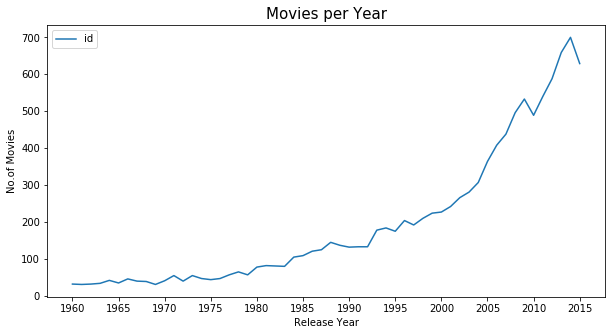

In [19]:
#let's plot the movies per release_year
plt.figure(figsize=(10,5))
df_movies_by_year.plot(xticks=(np.arange(1960,2016,step=5)))
plt.xlabel('Release Year')
plt.ylabel('No.of Movies')
plt.title('Movies per Year',fontsize=15)
#plt.xticks(np.arange(1960,2016,step=5))
plt.legend()
plt.show()

We can see from plot that higest number of movies are relesed between 2010 and 2015.In 2014 maximum number of movies were relesed i.e 700 then followed by year 2013(659) and 2015(629). 

### Q2.Which genre has highest release of movies?

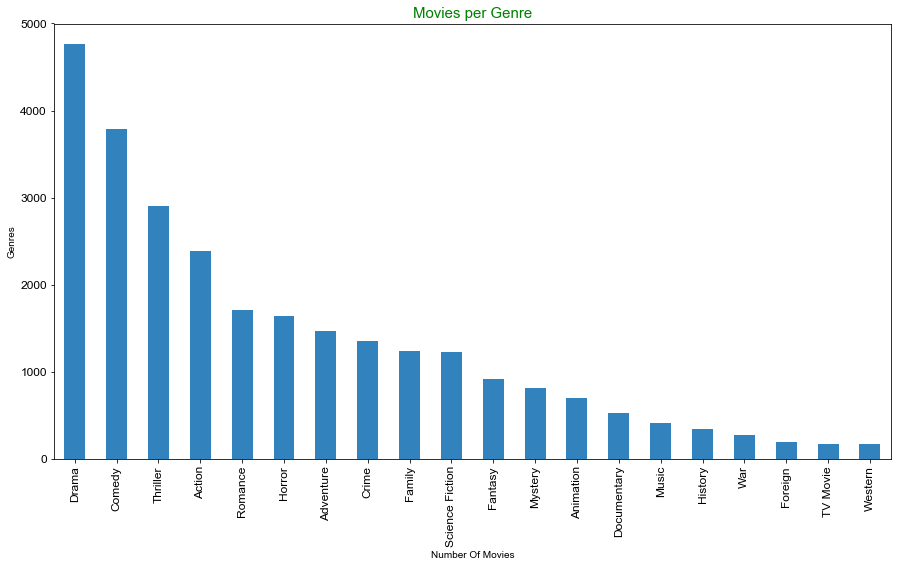

In [20]:
def count_genre(g):
   
    df_g = df[g].str.cat(sep = '|')        #concatenate
    df1 = pd.Series(df_g.split('|'))
    #conts each of the genre and return.
    g_count = df1.value_counts(ascending=False)
    return g_count


movies_per_genre = count_genre('genres')    # function call

plt.figure(figsize=(15,8))

movies_per_genre.plot(kind= 'bar',fontsize=12,colormap='tab20c')




plt.title("Movies per Genre", color='g',fontsize=15)
plt.xlabel('Number Of Movies')
plt.ylabel("Genres")
sns.set_style("darkgrid")


From above visualization it is clear that Drama genre has the highest release of movies over the years. The second highest number of movies were comedy based followed by thriller.

### Q3:Which Movie Has The Highest Or Lowest Profit?

As we know every movie has their own budget and revenue,so we can calculate the profit made by the movie. We can also find out the highest or lowest profit made by which movie.

In [21]:
# I will create the new column 'Profit' that will store the profit made by each movie in dataset
df['Profit'] = df['revenue'] - df['budget']

In [22]:
# It is always a good idea to create the one function that can be called as many times without writing the same code again and agian
def fn_minmax(p):
    #use the function 'idxmin' to find the index of lowest profit movie.
    min_index = df[p].idxmin()
    #use the function 'idxmax' to find the index of Highest profit movie.
    high_index = df[p].idxmax()
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie which has highest "+ p + " : ",df['original_title'][high_index])
    print("Movie which has lowest "+ p + "  : ",df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
fn_minmax('Profit')

Movie which has highest Profit :  Avatar
Movie which has lowest Profit  :  The Warrior's Way


,1386,2244
id,19995,46528
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.


It is clear from the above output that the movie which made highest profit was Avatar and which made the lowest was The Warrior's Way

### Q4.Which movie has highest and lowest earned revenue? 

In [23]:
fn_minmax('revenue')  # call function

Movie which has highest revenue :  Avatar
Movie which has lowest revenue  :  Wild Card


,1386,48
id,19995,265208
popularity,9.43277,2.93234
budget,237000000,30000000
revenue,2781505847,0
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
director,James Cameron,Simon West
runtime,162,92
genres,Action|Adventure|Fantasy|Science Fiction,Thriller|Crime|Drama
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Current Entertainment|Lionsgate|Sierra / Affin...


### Q5.Which movie has longest and shortest runtime?

In [24]:
df2= df.query('runtime == "0" ') ## movies with 0 runtime
df2


,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,Profit
92,370687,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015,0
334,361931,0.357654,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",2015-11-09,80,6.5,2015,0
410,339342,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,Kenny Gage|Devon Downs,0,Horror,NaN,2015-01-01,15,5.6,2015,0
445,353345,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,0,Horror,WT Canada Productions,2015-10-09,52,5.0,2015,0
486,333653,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,2015-04-05,11,5.4,2015,0
595,341051,0.028725,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,Michael Medaglia,0,Horror,NaN,2015-01-01,11,4.6,2015,0
616,325843,0.026797,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,Michael Goldfine,0,Drama|Comedy,NaN,2015-11-10,20,6.6,2015,0
1241,296370,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,0,Romance|Music|Comedy,NaN,2014-01-01,18,5.7,2014,0
1289,286372,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,0,Thriller|Horror|Mystery,Tiberius Film,2014-10-20,16,3.4,2014,-3250000
1293,286256,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,0,Documentary|Drama|Music,Globo Filmes,2014-10-30,14,6.0,2014,0


In [25]:
# we can fix it by replacing it with NaN
df2=df['runtime'].replace('0',np.nan)

In [26]:
df2.head()

0    124
1    120
2    119
3    136
4    137
Name: runtime, dtype: int64

In [27]:
fn_minmax('runtime')

Movie which has highest runtime :  The Story of Film: An Odyssey
Movie which has lowest runtime  :  Mythica: The Necromancer


,3894,92
id,125336,370687
popularity,0.006925,1.87604
budget,0,0
revenue,0,0
original_title,The Story of Film: An Odyssey,Mythica: The Necromancer
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...
director,Mark Cousins,A. Todd Smith
runtime,900,0
genres,Documentary,Fantasy|Action|Adventure
production_companies,NaN,Arrowstorm Entertainment|Camera 40 Productions...


### Q6.Top 20 movies with longest runtime.

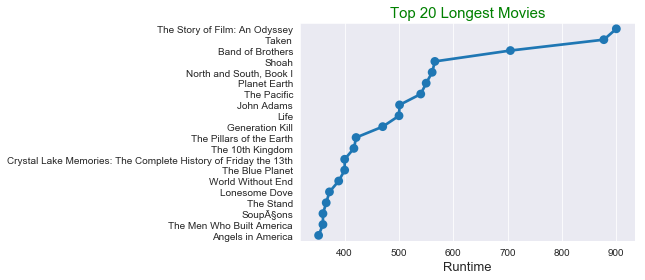

In [28]:
#top 20 Movies With Longest runtime
#sort the 'runtime' column in decending order and store it in the new dataframe.
info = pd.DataFrame(df['runtime'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 20 longest duraton movies data from the list and dataframe.
x = list(data[:20])
y = list(info['runtime'][:20])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(18,10)})
ax.set_title("Top 20 Longest Movies",fontsize = 15,color='green')
ax.set_xlabel("Runtime",fontsize = 13)
sns.set_style("whitegrid")

### Q7.Which length movies most liked by the audiences according to their popularity?

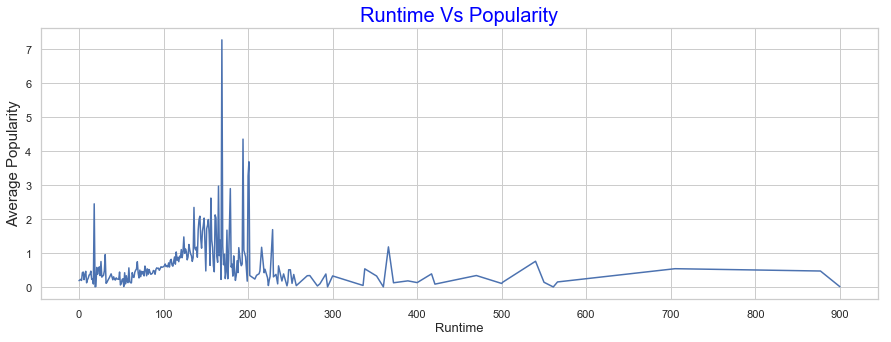

In [29]:
#I will use groupby function to group the data according to runtime.
#Then I will plot Runtime Vs Popularity to find out the which length of movies are mostly liked by people.

df.groupby('runtime')['popularity'].mean().plot(figsize = (15,5),xticks=np.arange(0,1000,100))

#setup the title of the figure

plt.title("Runtime Vs Popularity",fontsize = 20, color='blue')

#setup the x-label and y-label of the plot.

plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 15)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("darkgrid")

Above plot shows, the most poplular movies has runtime between 100 and 200 minutes(average runtime).

### Q8.Average Runtime Of Movies From Year To Year?

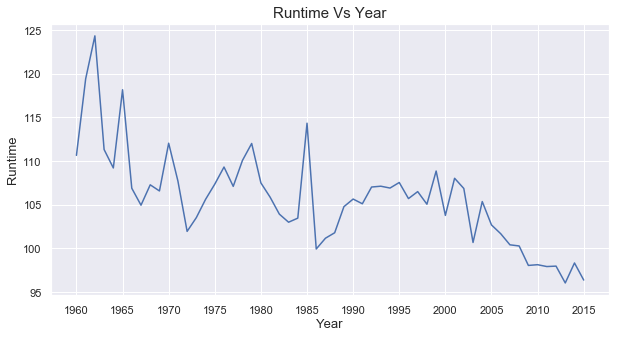

In [30]:
# Now we will find out how the runtime of the movies change year to year.


df.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,5))

#setup the figure size.
sns.set(rc={'figure.figsize':(8,6)})

#setup the title of the figure
plt.title("Runtime Vs Year",fontsize = 15)

#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Runtime',fontsize = 13)
sns.set_style("whitegrid")


From above plot, It is concluded that movies are getting shorter with passing year. Runtime of movies in year 1960 were longer than movies(2010-15).

### Q9. How does popularity affect the movie's profit?

C:\Users\manpr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Correlation Between Popularity And Profit :  0.6289972839642362


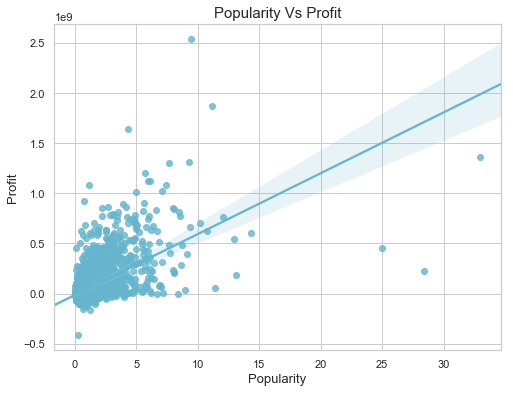

In [31]:
#Now we will make scatter plot find how data is scattered
ax = sns.regplot(x=df['popularity'],y=df['Profit'],color='c')

#setup the title and the labels of the scatter plot.
ax.set_title("Popularity Vs Profit",fontsize=15)
ax.set_xlabel("Popularity",fontsize=13)
ax.set_ylabel("Profit",fontsize=13)

#setup the figure size.
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("darkgrid")

#find the correlation between them.
df_corr=df.corr()
print("Correlation Between Popularity And Profit : ",df_corr.loc['popularity','Profit'])


Popularity and profit have positive correlation(0.61) that means movie with high popularity earns high profit.

<a id='conclusions'></a>
## Conclusions

1.Maximum number of movies released in year 2014(700) followed by 2013(659) and 2015(629).

2.Drama genre has the highest release of movies over the years. The second highest number of movies were comedy based followed by thriller.

3.The movie which made highest profit was Avatar and which made the lowest was The Warrior's Way

4.Avatar:has earned highest revenue

  Wild Card: has eraned lowest revenue
  
5.Movie which has highest runtime :  The Story of Film: An Odyssey

   Movie which has lowest runtime  :  Mythica: The Necromancer.
   
6.The most poplular movies has runtime between 100 and 200 minutes(average runtime) and average runtime of the movies is
decreasing year by year.

7.Popularity and profit have positive correlation(0.61) that means movie with high popularity earns high profit.




### Limitations:

First of all, the given dataset has a lot missing values.I tried to fix them but can't get rid all of them.It is not a 100% correct solution because given data had a lot of missing fields.We can't delete all missing fields because it create problems while making analysis.This affected the overall analysis.There will be other methods to do this analysis better than mine.I found average runtime,Genres(Drama,comedy,thriller),popularity had a great influence on the movies.
If we want to release movie by considering above influential factors that might help us to get popularity and large profit.

## References

#https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

#https://www.codecademy.com/articles/seaborn-design-i

#https://stackoverflow.com/questions/61298766/idmin-and-idmax-in-a-series-not-working